In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#Reading the data
df=pd.read_csv(r"G:\LILTHOMA\Rise_Wpu\Mentor_Mind\Identify_the_best_source_of_recruitment_for_a_tech_startup_Python\Recruitment_Data.csv")

In [3]:
#Dimenisions of the data
df.shape

(446, 4)

In [4]:
#Viewing the first 5 rows
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [5]:
#Summary statistics of the date
df.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


# EDA

In [6]:
df.isna().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [7]:
#Checking the unique values in recruitment_source column where we have missing values
df['recruiting_source'].unique()

array(['Applied Online', nan, 'Campus', 'Referral', 'Search Firm'],
      dtype=object)

In [8]:
#Checking if the dataset contains duplicate values
df.duplicated().sum()

0

In [9]:
missing_perct=round(df['recruiting_source'].isna().sum()/len(df)*100)
print(f"There is  {missing_perct}% data missing from recruiting_source")

There is  46% data missing from recruiting_source


In [12]:
#Imputing the missing values with Clusturing Techniques or other algorithm is olso a good option
#Here i think that as 46 % of values are missing there is a higher chance of underfitting and bias

In [10]:
#Lets Take NA values as Walk In
df.fillna("Walk In",inplace=True)

In [11]:
#Before Removing the Na values leets group the dataset with the NA values present and see if it checks out
grouped=df.groupby("recruiting_source").agg(
    total_attrition=("attrition","sum"),
    total_recruites=("attrition","count"),
    average_sales=("sales_quota_pct","mean")
).reset_index()
grouped['average_attrition']=round(grouped['total_attrition']/grouped['total_recruites']*100,2)

In [12]:
'''
*Most of the recruits by the company is Walkin followed by online recurits
*These Walk In in hires also have the highest averge_sales followed by online recurits
*Walk In interviews have the most less average attrition followed by online recuits
'''
#We will sort the dataframe to find the recuriting_source with lowest attrition  rate and high average sales
grouped.sort_values(by=["average_sales","average_attrition"],ascending=[0,1])

,recruiting_source,total_attrition,total_recruites,average_sales,average_attrition
4,Walk In,27,205,1.168109,13.17
0,Applied Online,32,130,1.058590,24.62
2,Referral,15,45,1.023198,33.33
1,Campus,16,56,0.908035,28.57
3,Search Firm,5,10,0.886960,50.00


Text(0, 0.5, 'Average_Attrition')

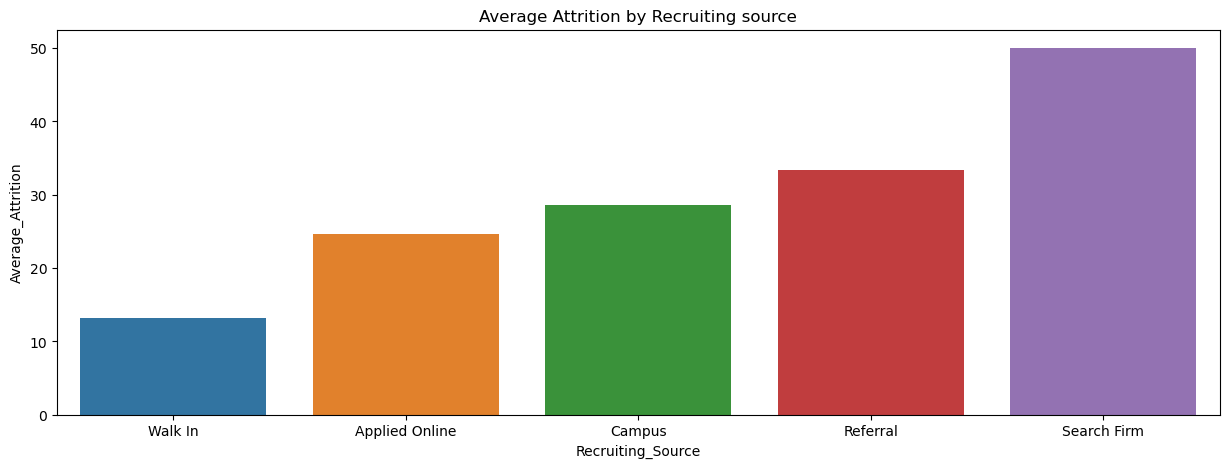

In [45]:
plt.figure(figsize=(15,5))
sn.barplot(data=grouped,x="recruiting_source",y="average_attrition",
          order=grouped.sort_values("average_attrition").recruiting_source)
plt.title("Average Attrition by Recruiting source")
plt.xlabel("Recruiting_Source")
plt.ylabel("Average_Attrition")

Text(0, 0.5, 'Average_Sales')

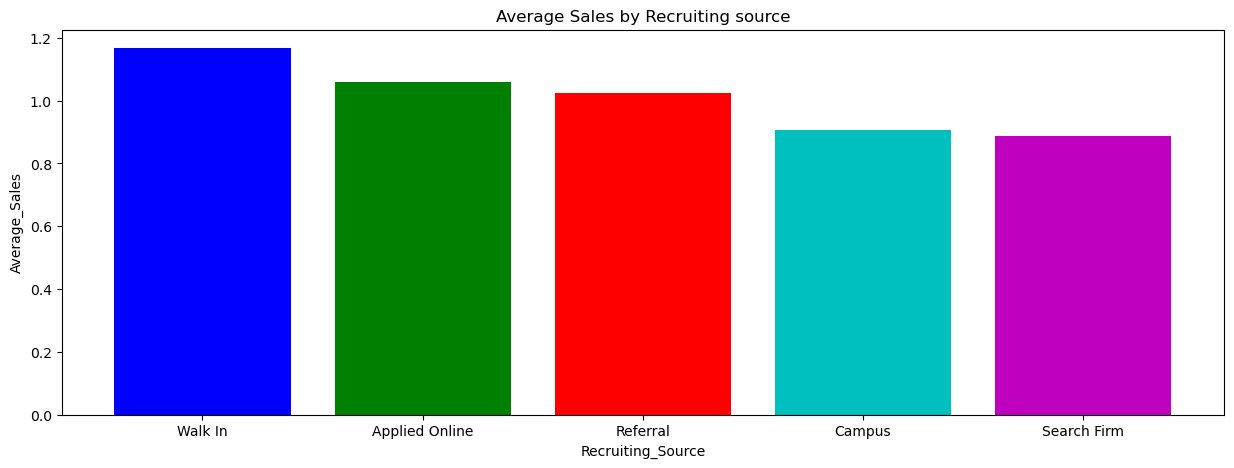

In [47]:
grouped_sorted = grouped.sort_values("average_sales",ascending=False)
plt.figure(figsize=(15,5))
plt.bar(grouped_sorted['recruiting_source'],grouped_sorted['average_sales'],color=["b","g","r","c","m"])
plt.title("Average Sales by Recruiting source")
plt.xlabel("Recruiting_Source")
plt.ylabel("Average_Sales")